DATA SCIENCE JOB SALARIES ANALYSIS

In [1]:
#import necessary libraries
#Numbers
import numpy as np          
import pandas as pd          
#Plot
import seaborn as sns         
import matplotlib.pyplot as plt
#Train test split
from sklearn import model_selection
from sklearn.model_selection import train_test_split        #sklearn package's randomised data splitting function
#model
from sklearn.linear_model import LinearRegression           #to model the ordinary least square linear regression
from sklearn.svm import SVR                                 #loading the svr model from sklearn.svm
#metrics
from sklearn import metrics                                 #sklearn metrics module implements utility functions
from sklearn import preprocessing                           #provides several common  utility functions:stansardisation
from scipy.stats import zscore                              #computes standard score relative to the sample mean and standard deviation
from sklearn.metrics import mean_squared_error              #determines the mean squared error regression loss
from sklearn.metrics import mean_absolute_error             #determines the mean absolute error regression loss
from sklearn.metrics import r2_score


In [5]:
#Reading the data as a dataframe
df=pd.read_csv("ds_salaries.csv")

In [6]:
#checking the number of rows and columns in a dataframe
df.shape

(607, 12)

In [7]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
#data type of each attribute
df.dtypes

Sno                    int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [9]:
#displaying the first five records of the dataframe
df.head()

,Sno,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
#checking if there are any null values in the dataset
df.isnull().values.any()

False

In [11]:
#description of the data 
df.describe()

,Sno,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [12]:
#Checking the number of unique values in each column
dict={}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
Sno,607
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3


In [13]:
#Separating Categorical and Continuous variables
cat_cols=['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 
            'employee_residence', 'remote_ratio', 'company_location', 'company_size']
con_cols = ['salary', 'salary_in_usd']

print("There are {} Categorical cols : {}".format(len(cat_cols), cat_cols))
print("There are {} Continuous cols : {}".format(len(con_cols), con_cols))

There are 9 Categorical cols : ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
There are 2 Continuous cols : ['salary', 'salary_in_usd']


EXPLORATORY DATA ANALYSIS(EDA)

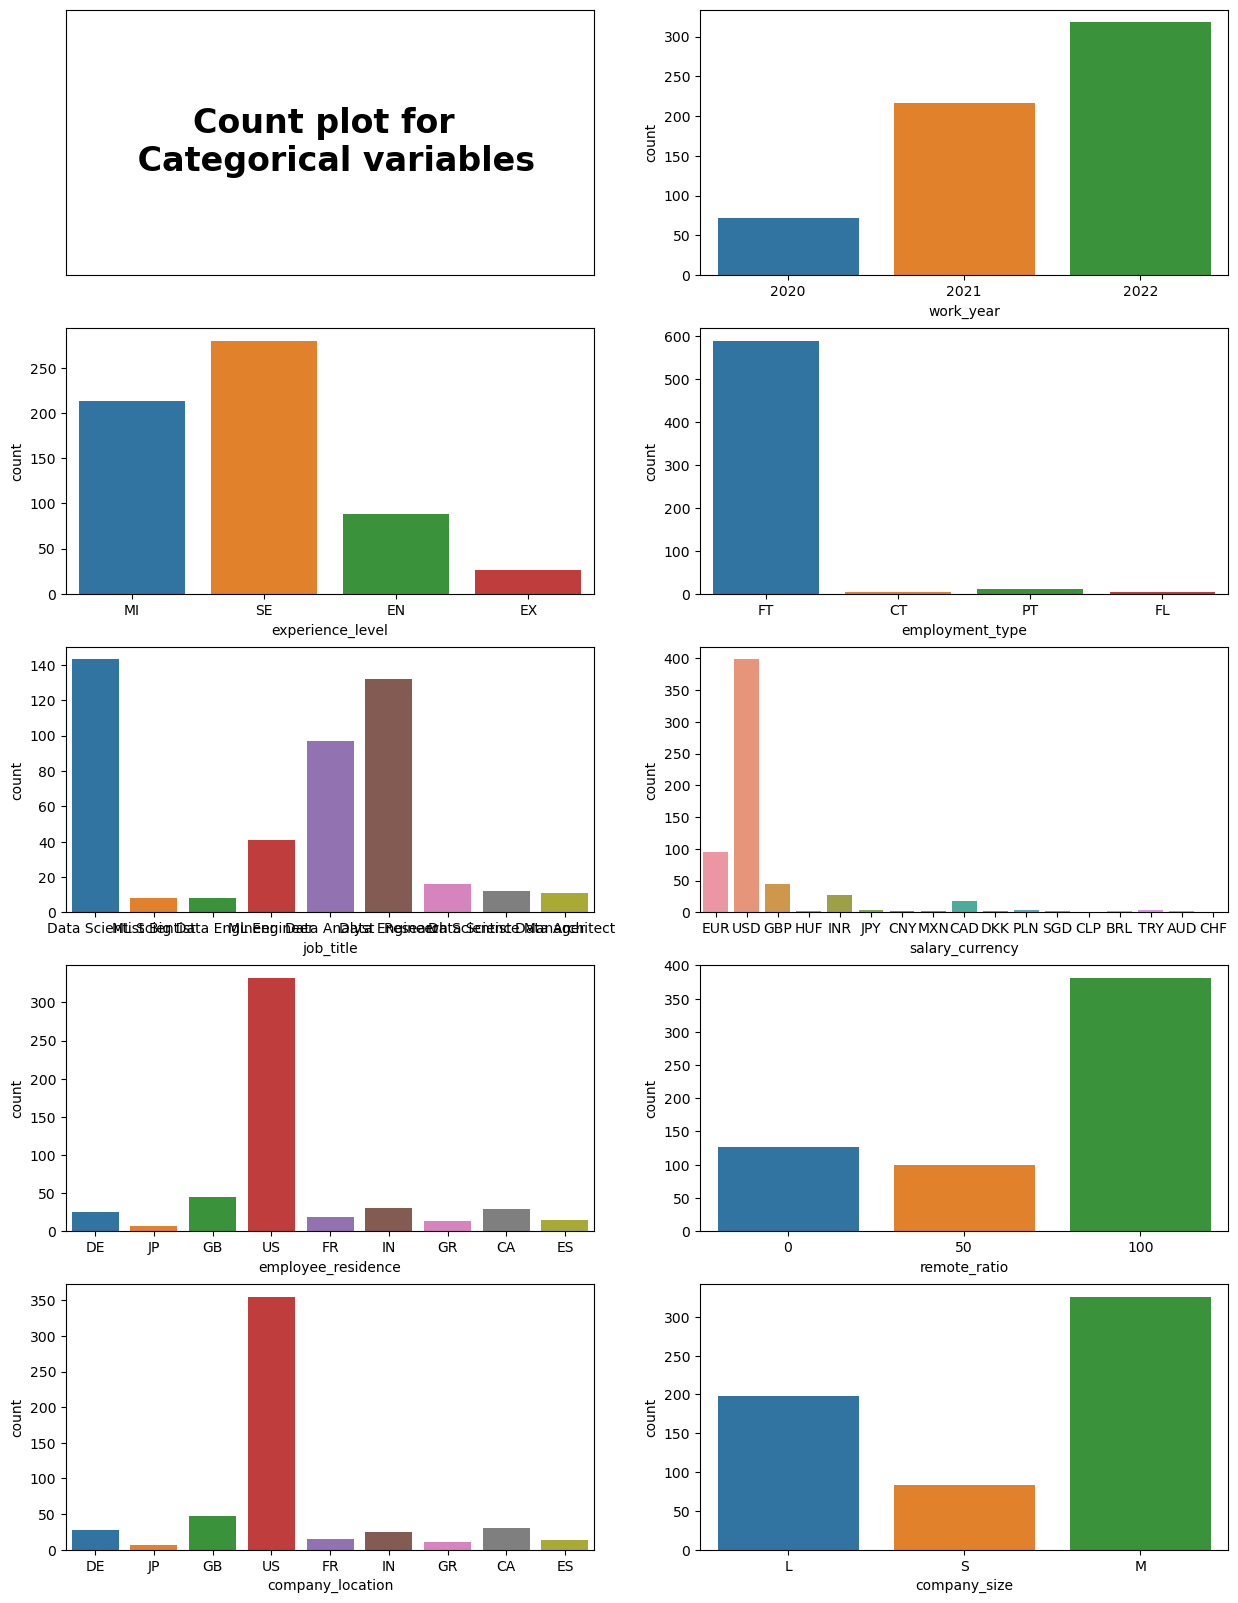

In [14]:
#Count plot for categorical variables
fig=plt.figure(figsize=(15,20))
gs = fig.add_gridspec(5, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(x=0.5, y=0.5, s="Count plot for \n Categorical variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='24', fontweight='bold')
ax0.tick_params(bottom=False, left=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(ax=ax1, data=df, x=cat_cols[0])


ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(ax=ax2, data=df, x=cat_cols[1])


ax3 = fig.add_subplot(gs[1,1])
sns.countplot(ax=ax3, data=df, x=cat_cols[2])

ax4 = fig.add_subplot(gs[2,0])

df_top_feature_values = df[cat_cols[3]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

sns.countplot(ax=ax4, data=df[df[cat_cols[3]].isin(top_values)], x=cat_cols[3])
trimmed_xlabels = [s.get_text().replace('Machine Learning', 'ML') for s in ax4.get_xticklabels()]
ax4.set_xticklabels(trimmed_xlabels)


ax5 = fig.add_subplot(gs[2,1])
sns.countplot(ax=ax5, data=df, x=cat_cols[4])

df_top_feature_values = df[cat_cols[5]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

ax6 = fig.add_subplot(gs[3,0])
sns.countplot(ax=ax6, data=df[df[cat_cols[5]].isin(top_values)], x=cat_cols[5])


ax7 = fig.add_subplot(gs[3,1])
sns.countplot(ax=ax7, data=df, x=cat_cols[6])


df_top_feature_values = df[cat_cols[7]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

ax8 = fig.add_subplot(gs[4,0])
sns.countplot(ax=ax8, data=df[df[cat_cols[7]].isin(top_values)], x=cat_cols[7])


ax9 = fig.add_subplot(gs[4,1])
sns.countplot(ax=ax9, data=df, x=cat_cols[8])


plt.show()

<Axes: >

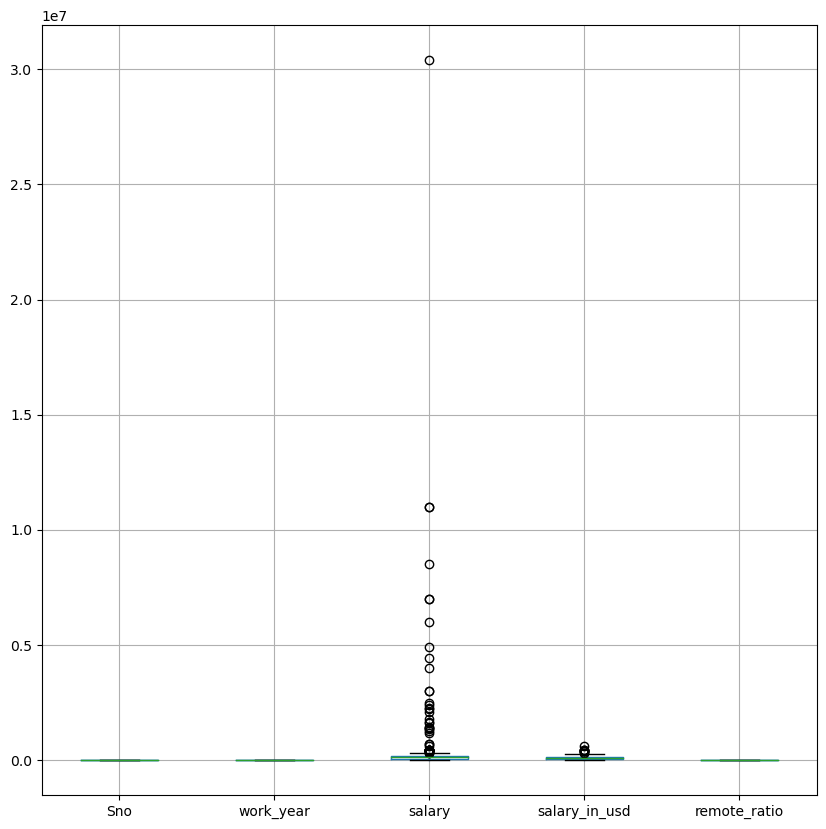

In [15]:
#detection of outliers
df.boxplot(figsize=(10,10))


Minimum value: 4000

first quartile value: 70000.0

third quartile value: 165000.0

maximum value: 30400000

interquartile range: 95000.0

lower bound value: -72500.0

upper bound value: 307500.0

outliers are present in salary attribute


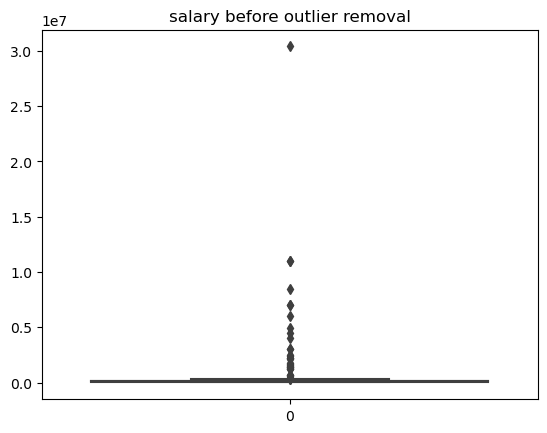

In [16]:
#checking the presence of outliers in 'salary'

sns.boxplot(df['salary'])
plt.title('salary before outlier removal')
                                                 #theoretical verification
sorted(df['salary'])  
                                                   #arranging 'salary' in ascending order
xsmall=df['salary'].min()                        #finding the minimum value of'salary'
q1,q3=np.percentile(df['salary'],[25,75])          #finding the quartile values
xlarge=df['salary'].max()                          #finding the maximum value of 'salary'
print('\nMinimum value:',xsmall)
print('\nfirst quartile value:',q1)
print('\nthird quartile value:',q3)
print('\nmaximum value:',xlarge)
iqr=q3-q1                                             #calculating the inter-quartile range                                       
print('\ninterquartile range:',iqr)
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
print('\nlower bound value:',lb)                     #lower bound values is 1.5 times inter-quartile range below q1
print('\nupper bound value:',ub)                      #upper bound values is 1.5 times inter-quartile range above q3
if xsmall<lb or xlarge>ub:
  print('\noutliers are present in salary attribute')
else:
  print(f'\noutliers are not present in salary attribute')
  

In [17]:
#trimming the upper outliers
df1=df[df['salary']<ub]                 
df1


,Sno,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Text(0.5, 1.0, 'salary after outlier removal')

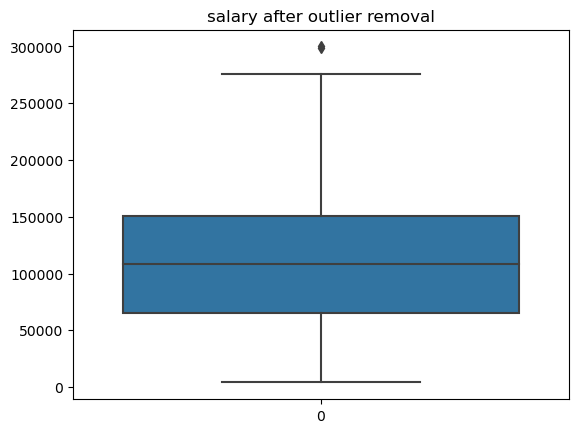

In [18]:
#plotting 'salary' after outlier removal
sns.boxplot(df1['salary']) 
plt.title('salary after outlier removal')


Minimum value: 2859

first quartile value: 62726.0

third quartile value: 150000.0

maximum value: 600000

interquartile range: 87274.0

lower bound value: -68185.0

upper bound value: 280911.0

outliers are present in salary_in_usd attribute


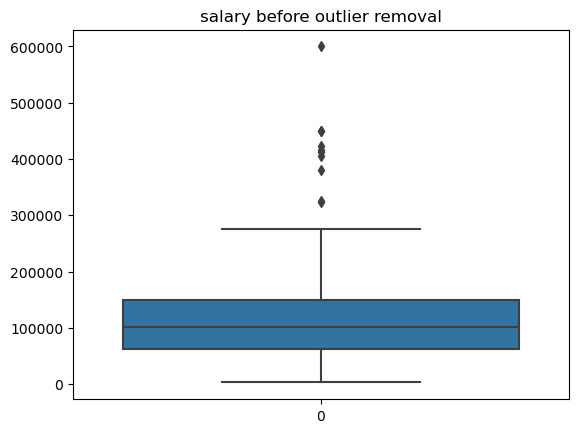

In [19]:
#checking the presence of outliers in 'salary_in_usd'
sns.boxplot(df['salary_in_usd'])
plt.title('salary before outlier removal')
                                                 #theoretical verification
sorted(df['salary_in_usd'])  
                                                   #arranging 'salary_in_usd' in ascending order
xsmall=df['salary_in_usd'].min()                        #finding the minimum value of'salary_in_usd'
q1,q3=np.percentile(df['salary_in_usd'],[25,75])          #finding the quartile values
xlarge=df['salary_in_usd'].max()                          #finding the maximum value of 'salary_in_usd'
print('\nMinimum value:',xsmall)
print('\nfirst quartile value:',q1)
print('\nthird quartile value:',q3)
print('\nmaximum value:',xlarge)
iqr=q3-q1                                             #calculating the inter-quartile range                                       
print('\ninterquartile range:',iqr)
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
print('\nlower bound value:',lb)                     #lower bound values is 1.5 times inter-quartile range below q1
print('\nupper bound value:',ub)                      #upper bound values is 1.5 times inter-quartile range above q3
if xsmall<lb or xlarge>ub:
  print('\noutliers are present in salary_in_usd attribute')
else:
  print(f'\noutliers are not present in salary_in_usd in usd attribute')
  

In [20]:
#trimming the upper outliers
df2=df[df['salary_in_usd']<ub]   

df2              



,Sno,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Text(0.5, 1.0, 'salary_in_usd after outlier removal')

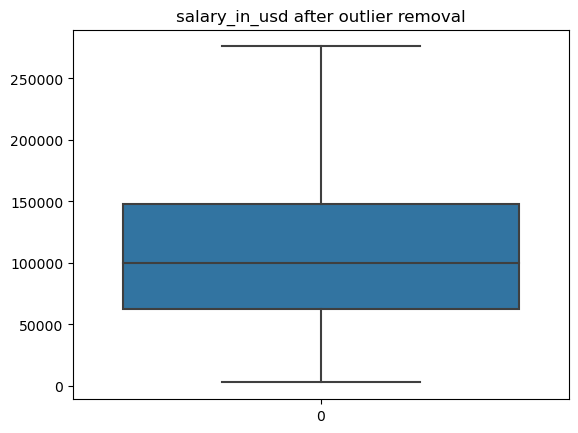

In [21]:
#plotting 'salary in usd' after outlier removal
sns.boxplot(df2['salary_in_usd']) 


plt.title('salary_in_usd after outlier removal')

<Axes: xlabel='salary_in_usd', ylabel='Density'>

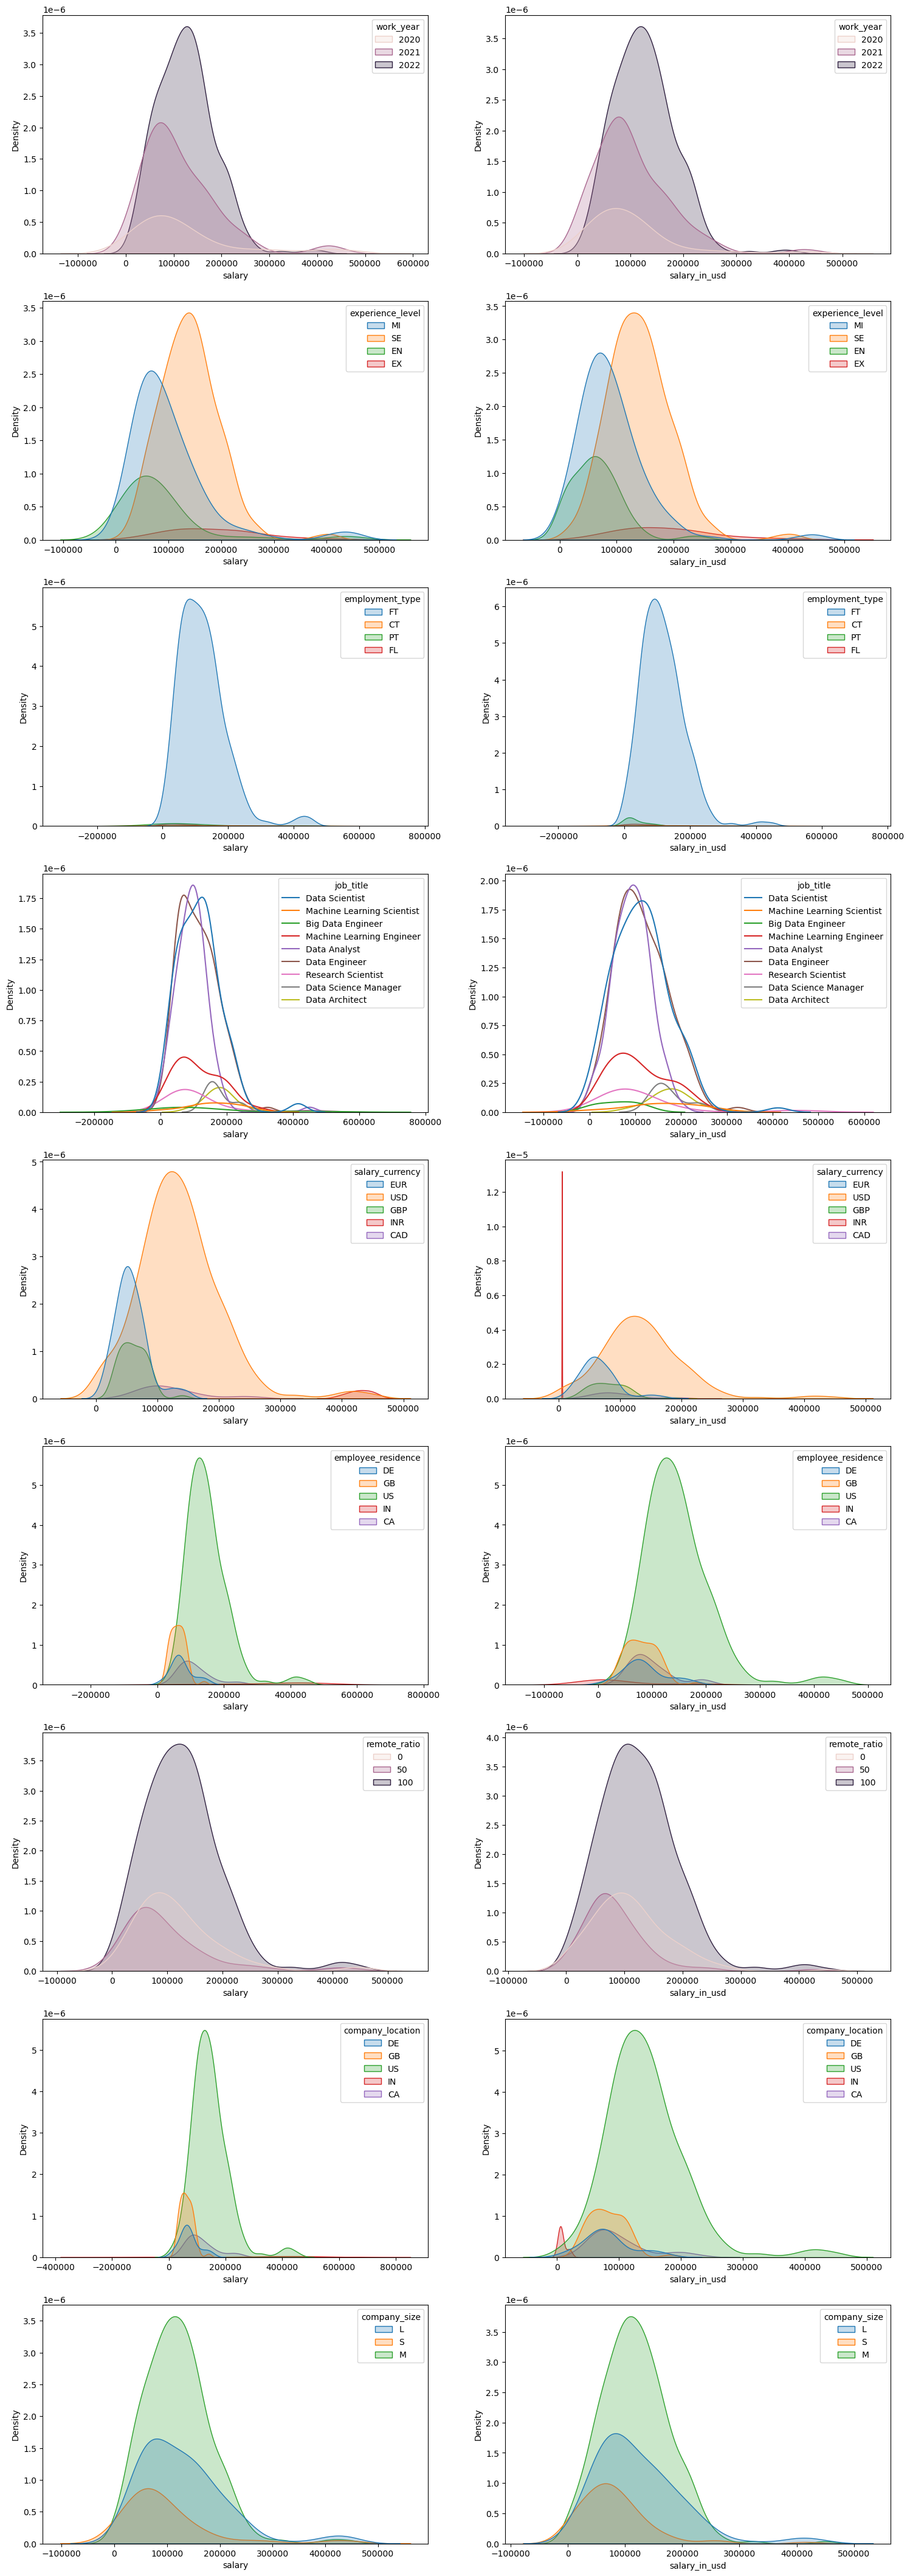

In [22]:
#Distribution of categorical features against salary
fig = plt.figure(figsize=(18,54))
gs = fig.add_gridspec(9,2)

df_copy = df

# Removing outlier values of salary column to get better visualization.
df_copy = df_copy[df_copy[con_cols[0]] < 6e5]
df_copy = df_copy[df_copy[con_cols[1]] < 5e5]

ax0 = fig.add_subplot(gs[0,0])
sns.kdeplot(ax=ax0, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[0])
ax1 = fig.add_subplot(gs[0,1])
sns.kdeplot(ax=ax1, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[0])


ax2 = fig.add_subplot(gs[1,0])
sns.kdeplot(ax=ax2, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[1])
ax3 = fig.add_subplot(gs[1,1])
sns.kdeplot(ax=ax3, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[1])


ax4 = fig.add_subplot(gs[2,0])
sns.kdeplot(ax=ax4, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[2])
ax5 = fig.add_subplot(gs[2,1])
sns.kdeplot(ax=ax5, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[2])

df_top_feature_values = df[cat_cols[3]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

ax6 = fig.add_subplot(gs[3,0])
sns.kdeplot(ax=ax6, data=df_copy[df_copy[cat_cols[3]].isin(top_values)], x=con_cols[0], fill=False, hue=cat_cols[3])
ax7 = fig.add_subplot(gs[3,1])
sns.kdeplot(ax=ax7, data=df_copy[df_copy[cat_cols[3]].isin(top_values)], x=con_cols[1], fill=False, hue=cat_cols[3])

df_top_feature_values = df[cat_cols[4]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(5)

ax8 = fig.add_subplot(gs[4,0])
sns.kdeplot(ax=ax8, data=df_copy[df_copy[cat_cols[4]].isin(top_values)], x=con_cols[0], fill=True, hue=cat_cols[4])
ax9 = fig.add_subplot(gs[4,1])
sns.kdeplot(ax=ax9, data=df_copy[df_copy[cat_cols[4]].isin(top_values)], x=con_cols[1], fill=True, hue=cat_cols[4])

df_top_feature_values = df[cat_cols[5]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(5)

ax10 = fig.add_subplot(gs[5,0])
sns.kdeplot(ax=ax10, data=df_copy[df_copy[cat_cols[5]].isin(top_values)], x=con_cols[0], fill=True, hue=cat_cols[5])
ax11 = fig.add_subplot(gs[5,1])
sns.kdeplot(ax=ax11, data=df_copy[df_copy[cat_cols[5]].isin(top_values)], x=con_cols[1], fill=True, hue=cat_cols[5])

ax12 = fig.add_subplot(gs[6,0])
sns.kdeplot(ax=ax12, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[6])
ax13 = fig.add_subplot(gs[6,1])
sns.kdeplot(ax=ax13, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[6])

df_top_feature_values = df[cat_cols[7]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(5)

ax14 = fig.add_subplot(gs[7,0])
sns.kdeplot(ax=ax14, data=df_copy[df_copy[cat_cols[7]].isin(top_values)], x=con_cols[0], fill=True, hue=cat_cols[7])
ax15 = fig.add_subplot(gs[7,1])
sns.kdeplot(ax=ax15, data=df_copy[df_copy[cat_cols[7]].isin(top_values)], x=con_cols[1], fill=True, hue=cat_cols[7])

ax16 = fig.add_subplot(gs[8,0])
sns.kdeplot(ax=ax16, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[8])
ax17 = fig.add_subplot(gs[8,1])
sns.kdeplot(ax=ax17, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[8])

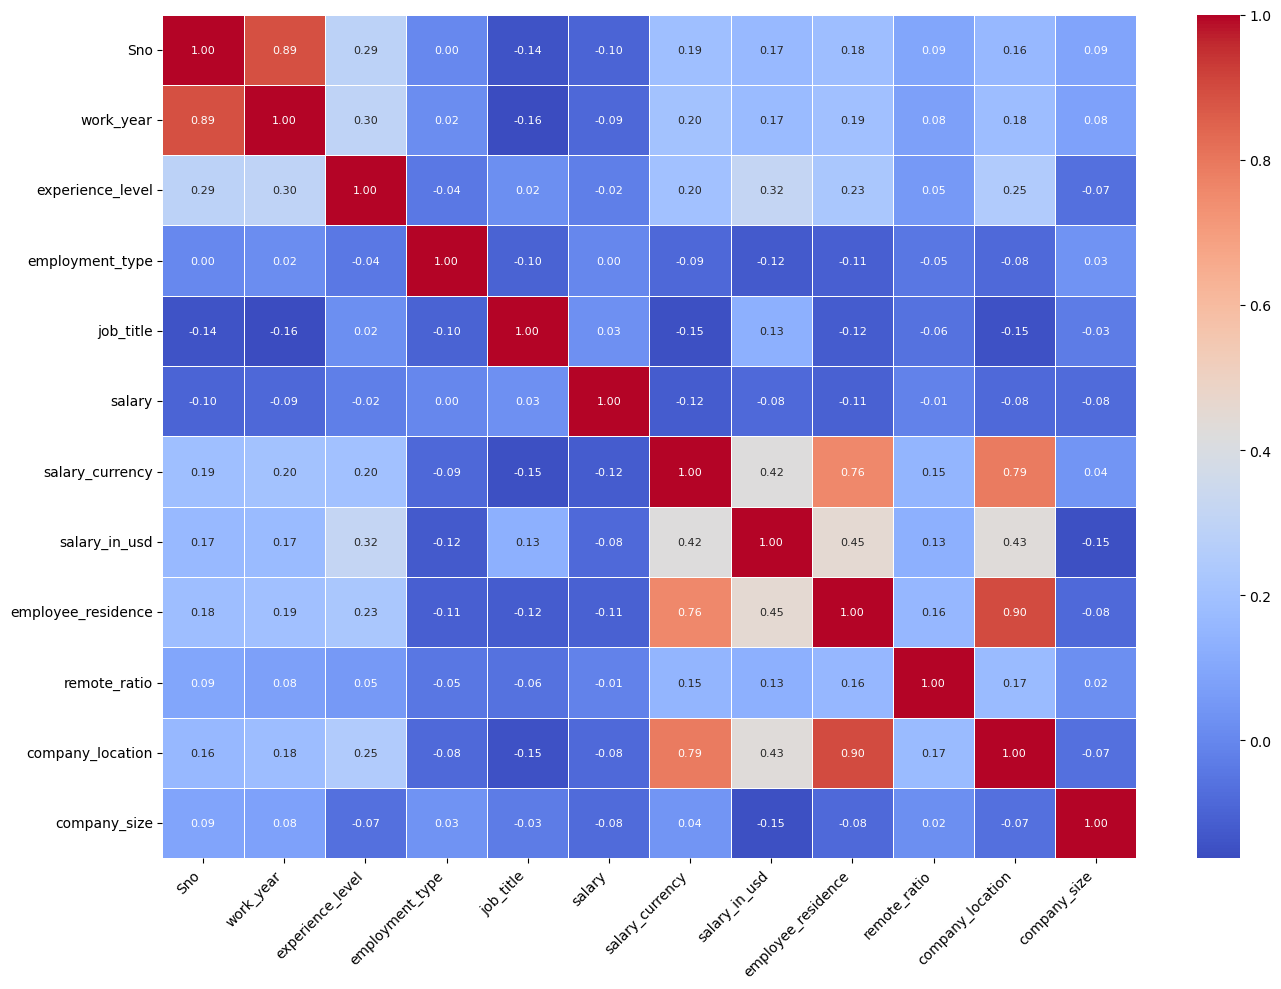

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your correlation matrix is stored in a variable named 'corr_matrix'
# Replace this with your actual correlation matrix
corr_matrix = df.corr()

# Adjust the figure size and plot the heatmap again
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8}, linewidths=0.5)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Vidhathri B Sharma\AppData\Local\Temp\ipykernel_27040\1024523815.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(['$'+ str(s) for s in ax0.get_yticks()])
C:\Users\Vidhathri B Sharma\AppData\Local\Temp\ipykernel_27040\1024523815.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax1.set_yticklabels([str(s) + '%' for s in ax1.get_yticks()])


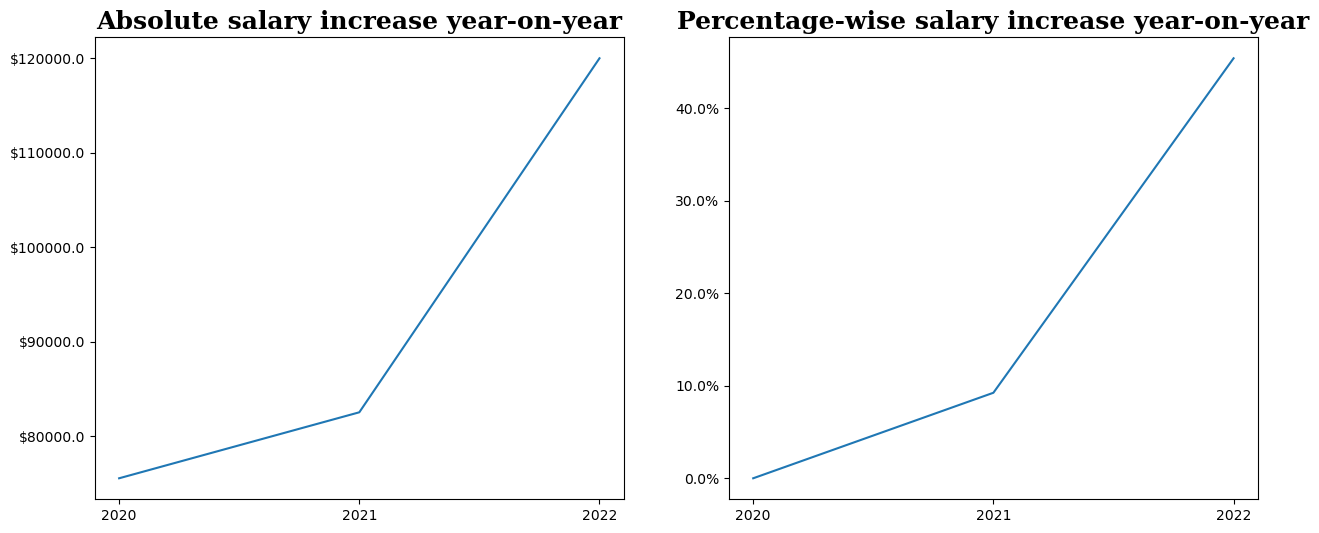

In [28]:
#Year-on-Year basis increase in salary in USD 
yr_2020 = df[df['work_year'] == 2020]['salary_in_usd'].median()
yr_2021 = df[df['work_year'] == 2021]['salary_in_usd'].median()
yr_2022 = df[df['work_year'] == 2022]['salary_in_usd'].median()

fig = plt.figure(figsize=(15,6))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
grid = sns.lineplot(ax=ax0, y=[yr_2020, yr_2021, yr_2022], x=[2020, 2021, 2022])
plt.title('Absolute salary increase year-on-year',fontsize=18, fontweight='bold', fontfamily='serif')
ax0.set_xticks([2020, 2021, 2022])
ax0.set_yticklabels(['$'+ str(s) for s in ax0.get_yticks()])

ax1 = fig.add_subplot(gs[0,1])
sns.lineplot(ax=ax1, y=[0, (yr_2021-yr_2020)*100/yr_2020, (yr_2022-yr_2021)*100/yr_2021], x=[2020, 2021, 2022])
plt.title('Percentage-wise salary increase year-on-year',fontsize=18, fontweight='bold', fontfamily='serif')
ax1.set_xticks([2020, 2021, 2022])
_ = ax1.set_yticklabels([str(s) + '%' for s in ax1.get_yticks()])

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['experience_level']=le.fit_transform(df['experience_level'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['job_title']=le.fit_transform(df['job_title'])
df['salary_currency']=le.fit_transform(df['salary_currency'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])

In [30]:
df

,Sno,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,70000,7,79833,14,0,12,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2,2020,3,2,7,85000,8,109024,20,50,18,1
3,3,2020,2,2,47,20000,16,20000,23,0,20,2
4,4,2020,3,2,38,150000,16,150000,55,50,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,3,2,17,154000,16,154000,55,100,48,1
603,603,2022,3,2,17,126000,16,126000,55,100,48,1
604,604,2022,3,2,12,129000,16,129000,55,0,48,1
605,605,2022,3,2,12,150000,16,150000,55,100,48,1


In [31]:
X=df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']     
  


In [32]:
XScaled=X.apply(zscore)


In [33]:
#spliting the data into training and test data in the ratio of 70:30 respectively
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
#checking splitting of data
print('X training data size: {}'.format(X_train.shape))
print('X training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test.shape))
print('X testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index))*100))

X training data size: (424, 11)
X training data size: (424,)
X testing data size: (183, 11)
X testing data size: (183,)
69.85% of data is in training set
30.15% of data is in test set


In [35]:
#fitting a simple linear model
lr=LinearRegression()
lr.fit(X_train,y_train)       #fitting the model on training data
y_pred_lr=lr.predict(X_test)  #making prediction on test data

In [36]:
print("linear regression model coefficients:",(lr.coef_))    #printing the coefficients
print('L R R2_score on training data:',lr.score(X_train,y_train))   #coeficient of determination used to perform lr model
print('L R R2_score on test data:',lr.score(X_test,y_test))
print('LR mean square error:',mean_squared_error(y_test,y_pred_lr)) #measures the avg of squares of errors
print('LR root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred_lr))) #square root of mean of the square of all errors
print('LR mean absolute error:',mean_absolute_error(y_test,y_pred_lr)) #mean over absolute difference between true and predicted values

linear regression model coefficients: [-4.15686048e+00  3.99077176e+03  1.30383446e+04 -7.55652866e+03
  1.40941263e+03 -1.66546511e-03  3.69839528e+03  6.96492817e+02
  1.23103917e+02  2.33286414e+02 -1.40852382e+04]
L R R2_score on training data: 0.3171366813194859
L R R2_score on test data: 0.3343524872716974
LR mean square error: 2781239231.0054936
LR root mean square error: 52737.45567436387
LR mean absolute error: 38983.26451663974


In [37]:
from sklearn.linear_model import Ridge # To model Linear least squares with l2 regularization
from sklearn.linear_model import Lasso # Linear Model trained with L1 prior as regularizer

In [38]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train) # Fitting the model on Training data
y_pred_ridge = ridge.predict(X_test) # Making predictions on Test data
print("Ridge model coefficients:", (ridge.coef_)) # Printing the coefficients
print('\nRidge R2_score on training data:',ridge.score(X_train, y_train))
print('Ridge R2_score on test data:',ridge.score(X_test, y_test))
print('Ridge Mean Square Error :',mean_squared_error(y_test,y_pred_ridge))
print('Ridge Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Ridge Mean Absolute Error :',mean_absolute_error(y_test, y_pred_ridge))

Ridge model coefficients: [-4.04318401e+00  3.95723747e+03  1.30304994e+04 -7.47043401e+03
  1.40963856e+03 -1.66474297e-03  3.69702816e+03  6.96816496e+02
  1.23093976e+02  2.33714339e+02 -1.40605248e+04]

Ridge R2_score on training data: 0.317136519931424
Ridge R2_score on test data: 0.33430888332392883
Ridge Mean Square Error : 2781421419.03721
Ridge Root Mean Square Error : 52739.182957619
Ridge Mean Absolute Error : 38983.72104225758


In [39]:
# Creating a regularized LASSO model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train) # Fitting the model on Training data
y_pred_lasso = lasso.predict(X_test) # Making predictions on Test data
print("Lasso model coefficients:", (lasso.coef_)) # Printing the coefficients
print('\nLasso R2_score on training data:',lasso.score(X_train, y_train))
print('Lasso R2_score on test data:',lasso.score(X_test, y_test))
print('Lasso Mean Square Error :',mean_squared_error(y_test,y_pred_lasso))
print('Lasso Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('Lasso Mean Absolute Error :',mean_absolute_error(y_test, y_pred_lasso))

Lasso model coefficients: [-4.15310143e+00  3.98964777e+03  1.30382823e+04 -7.55486585e+03
  1.40941412e+03 -1.66545737e-03  3.69837556e+03  6.96497974e+02
  1.23103571e+02  2.33292451e+02 -1.40849656e+04]

Lasso R2_score on training data: 0.31713668126139194
Lasso R2_score on test data: 0.3343516416829895
Lasso Mean Square Error : 2781242764.0833507
Lasso Root Mean Square Error : 52737.48917120866
Lasso Mean Absolute Error : 38983.266633979496


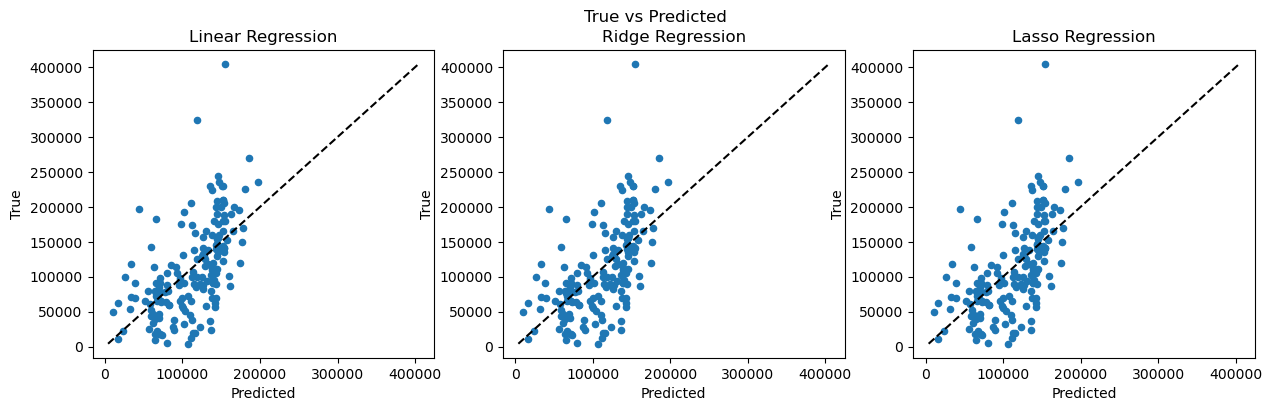

In [40]:
# Plotting the predictions of LR, Ridge, Lasso
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")
ax2.scatter(y_pred_ridge, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Ridge Regression")
ax3.scatter(y_pred_lasso, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Lasso Regression")
fig.suptitle("True vs Predicted");

In [41]:
from sklearn.preprocessing import PolynomialFeatures # Generates a new feature matrix consisting of all polynomial combinations of the features
from sklearn.linear_model import ElasticNet

In [42]:
# Generating polynomial models reflecting the non-linear interaction between some dimensions
poly = PolynomialFeatures(degree = 2, interaction_only=True) # degree = 2 means quadratic
X_poly = poly.fit_transform(XScaled) # Perform a polynomial features transform of the dataset
# Splitting the poly featured data into training and test set in the ratio of 70:30 respectively
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1) # 1
#is just any random seed number
# Checking split of data
print('X training data size: {}'.format(X_train_poly.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test_poly.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train_poly)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test_poly)/len(df.index)) * 100))
# Fitting a simple non-regularized linear model on poly features(degree=2)
lr = LinearRegression()
lr.fit(X_train_poly, y_train) # Fitting the model on Training data
y_pred_lr = lr.predict(X_test_poly) # Making predictions on Test data
print('Linear Regression poly feature model coefficients:',lr.coef_) # Printing the coefficients
print('\nLR poly model R2_score on training data:',lr.score(X_train_poly, y_train))
print('LR poly model R2_score on test data :',lr.score(X_test_poly, y_test))
print('LR Mean Square Error :',mean_squared_error(y_test,y_pred_lr))
print('LR Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('LR Mean Absolute Error :',mean_absolute_error(y_test, y_pred_lr))

X training data size: (424, 67)
y training data size: (424,)
X testing data size: (183, 67)
y testing data size: (183,)
69.85% of data is in training set
30.15% of data is in test set
Linear Regression poly feature model coefficients: [ 9.31887739e-10 -2.15316367e+02  1.18486028e+04  1.56970336e+04
 -3.87618439e+03 -2.09602139e+03  4.76889009e+05 -9.10755132e+04
  2.02613161e+05  5.71434137e+03 -1.30031459e+04 -6.86231730e+03
  6.91375692e+03  4.02394771e+03  2.48495266e+04  6.48543022e+03
  1.04510962e+05  1.05027789e+04 -1.69712028e+04  1.71585135e+03
  1.30145393e+04  5.36564959e+03 -4.73394491e+03 -2.57622163e+04
 -1.53921166e+04 -1.77251298e+04 -8.94830133e+03  2.29777602e+04
  2.47856184e+03 -2.03658853e+04 -1.58833903e+03  2.44798063e+03
  3.42203899e+03  6.13588012e+04  1.37432051e+04 -7.38858610e+03
 -6.09474769e+02 -8.01222639e+03  1.92106848e+03  1.55191341e+03
 -3.64741647e+04  6.51595337e+03  7.31846025e+03 -2.07836901e+04
 -7.77980902e+03 -2.78664366e+03 -5.58267872e+04  

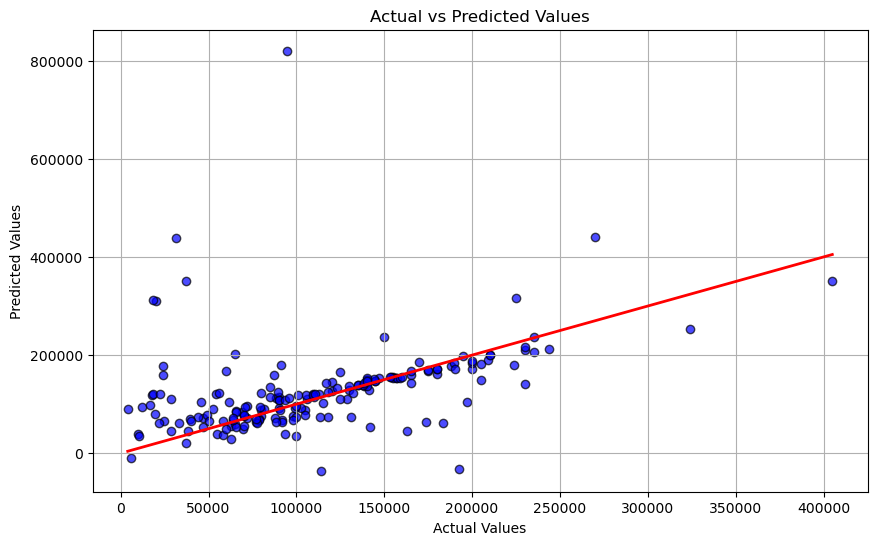

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.grid(True)
plt.show()


In [50]:
poly = PolynomialFeatures(degree = 5, interaction_only=True) 
X_poly = poly.fit_transform(XScaled) # Perform a polynomial features transform of the dataset
# Splitting the poly featured data into training and test set in the ratio of 70:30 respectively
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1) # 1
#is just any random seed number
# Checking split of data
print('X training data size: {}'.format(X_train_poly.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test_poly.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train_poly)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test_poly)/len(df.index)) * 100))
# Fitting a simple non-regularized linear model on poly features(degree=2)
lr = LinearRegression()
lr.fit(X_train_poly, y_train) # Fitting the model on Training data
y_pred_lr = lr.predict(X_test_poly) # Making predictions on Test data
print('Linear Regression poly feature model coefficients:',lr.coef_) # Printing the coefficients
print('\nLR poly model R2_score on training data:',lr.score(X_train_poly, y_train))
print('LR poly model R2_score on test data :',lr.score(X_test_poly, y_test))
print('LR Mean Square Error :',mean_squared_error(y_test,y_pred_lr))
print('LR Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('LR Mean Absolute Error :',mean_absolute_error(y_test, y_pred_lr))

X training data size: (424, 1024)
y training data size: (424,)
X testing data size: (183, 1024)
y testing data size: (183,)
69.85% of data is in training set
30.15% of data is in test set
Linear Regression poly feature model coefficients: [-6.43702151e-07 -1.68881011e+04  1.77905506e+05 ...  1.10336441e+04
 -2.87903908e+04  2.37508668e+04]

LR poly model R2_score on training data: 1.0
LR poly model R2_score on test data : -356.6764056344149
LR Mean Square Error : 1494460104384.8716
LR Root Mean Square Error : 1222481.1263920893
LR Mean Absolute Error : 367245.413719956


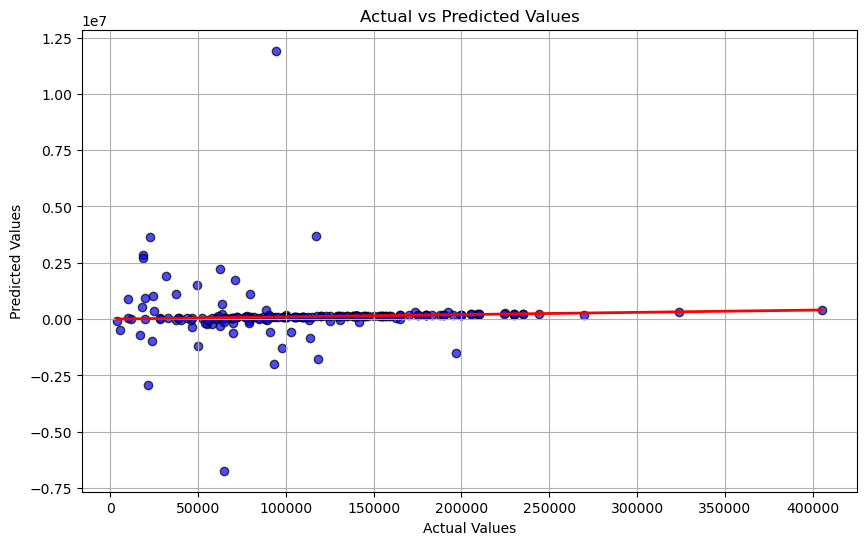

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.grid(True)
plt.show()

In [57]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(XScaled) # Perform a polynomial features transform of the dataset
# Splitting the poly featured data into training and test set in the ratio of 70:30 respectively
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1) # 1
#is just any random seed number
# Checking split of data
print('X training data size: {}'.format(X_train_poly.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test_poly.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train_poly)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test_poly)/len(df.index)) * 100))
# Fitting a simple non-regularized linear model on poly features(degree=2)
lr = LinearRegression()
lr.fit(X_train_poly, y_train) # Fitting the model on Training data
y_pred_lr = lr.predict(X_test_poly) # Making predictions on Test data
print('Linear Regression poly feature model coefficients:',lr.coef_) # Printing the coefficients
print('\nLR poly model R2_score on training data:',lr.score(X_train_poly, y_train))
print('LR poly model R2_score on test data :',lr.score(X_test_poly, y_test))
print('LR Mean Square Error :',mean_squared_error(y_test,y_pred_lr))
print('LR Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('LR Mean Absolute Error :',mean_absolute_error(y_test, y_pred_lr))

X training data size: (424, 232)
y training data size: (424,)
X testing data size: (183, 232)
y testing data size: (183,)
69.85% of data is in training set
30.15% of data is in test set
Linear Regression poly feature model coefficients: [ 2.28752788e-07 -4.10661566e+13 -3.12674804e+15  2.96918799e+15
 -1.00725439e+16 -3.35184617e+15  2.16965051e+14  2.57301910e+15
 -1.72135275e+15 -1.79736299e+15 -1.49217392e+15  8.81581003e+14
 -3.44263534e+15  3.79892866e+14  1.47431220e+15 -2.36255305e+15
 -1.61255242e+14  6.42153915e+14 -1.41242152e+15 -1.18978343e+13
  6.82132750e+14 -1.05210372e+15  1.19325405e+15  1.12253085e+17
 -7.09910243e+14  2.88882428e+14 -1.78393986e+15 -1.48563424e+15
 -3.97189411e+15  1.30262771e+14  3.46966701e+12 -1.06596537e+17
  1.34124469e+15 -1.93470489e+14 -1.33756847e+15 -3.93168375e+15
  9.28162914e+14  1.16357667e+15 -2.02702817e+15  1.20334312e+17
 -7.78924173e+15 -9.23737151e+16  6.17981219e+16  6.45269586e+16
  5.35703947e+16 -3.16495561e+16 -3.38750073e+13

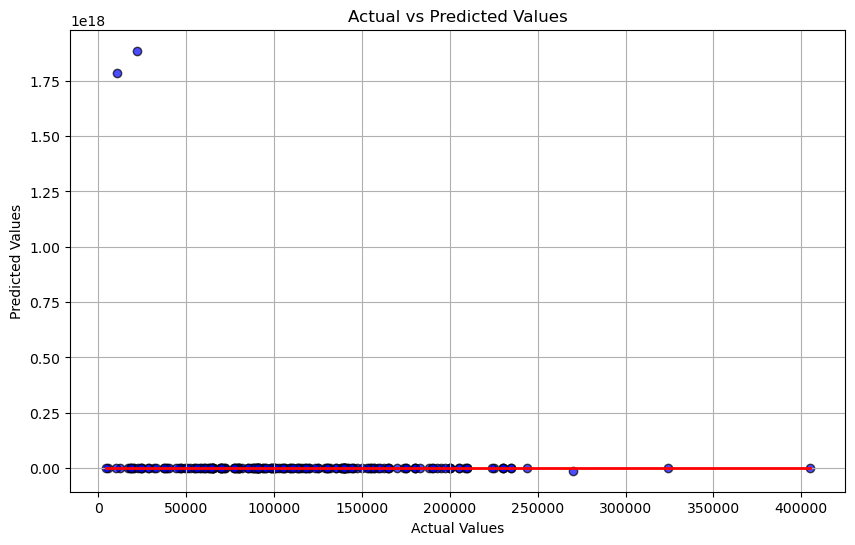

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.grid(True)
plt.show()

In [61]:
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index)) * 100))
# Fitting a Elastic Net Regression
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train) # Fitting the model on Training data
y_pred_en = en.predict(X_test) # Making predictions on Test data
print("Elastic Net Regression model coefficients:", (en.coef_)) # Printing the coefficients
print('\nEN R2_score on training data:',en.score(X_train, y_train))
print('EN R2_score on test data:',en.score(X_test, y_test))
print('EN Mean Square Error :',mean_squared_error(y_test,y_pred_en))
print('EN Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_en)))
print('EN Mean Absolute Error :',mean_absolute_error(y_test, y_pred_en))

X training data size: (424, 11)
y training data size: (424,)
X testing data size: (183, 11)
y testing data size: (183,)
69.85% of data is in training set
30.15% of data is in test set
Elastic Net Regression model coefficients: [ 1.06634110e+01  6.81447938e+02  8.85064586e+03 -8.05533764e+02
  1.45637954e+03 -1.46301203e-03  3.07939769e+03  7.53619748e+02
  1.18467740e+02  4.33968618e+02 -6.39203871e+03]

EN R2_score on training data: 0.3082666212474453
EN R2_score on test data: 0.32038180135266425
EN Mean Square Error : 2839612197.206197
EN Root Mean Square Error : 53288.01175880178
EN Mean Absolute Error : 39453.4833151856


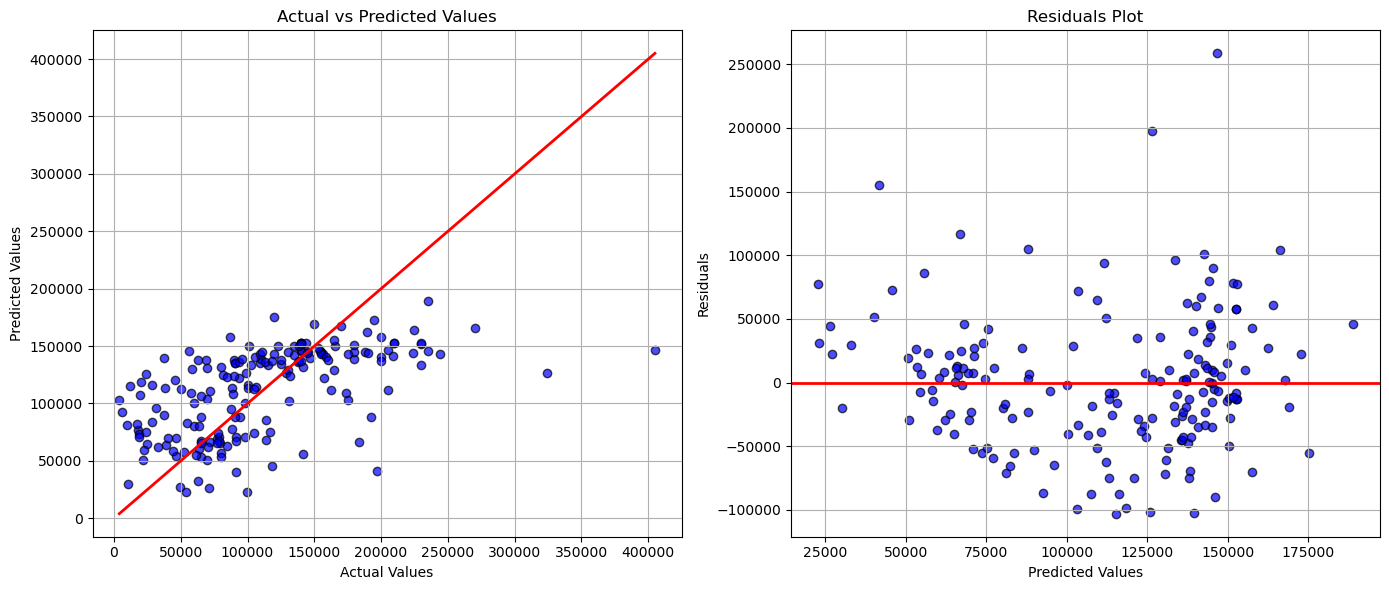

In [62]:
plt.figure(figsize=(14, 6))

# Subplot 1: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_en, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Subplot 2: Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_en
plt.scatter(y_pred_en, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [47]:
!jupyter nbconvert --to html Data_science_job_salaries\ \(2\).ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Data_science_job_salaries\\' matched no files
[NbConvertApp] WARNING | pattern '\\(2\\).ipynb' matched no files
